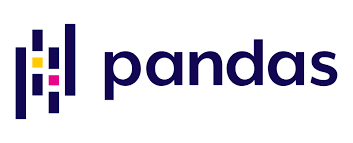

## [45] Memadukan loc dan iloc untuk melakukan seleksi data

### [45.1] Import Module

In [1]:
import pandas as pd
print(pd.__version__)

1.0.5


### [45.2] Persiapan Data Frame

In [2]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### [45.3] Memadukan loc dan iloc untuk melakukan seleksi data
- Parameter loc dan iloc terdiri dari sisi sebelah kiri yang berkorelasi dengan baris dan sebelah kanan yang berkorelasi dengan kolom
- Pada perpaduan loc dan iloc untuk menyeleksi data , penyeleksian baris dilakukan oleh iloc dan penyeleksian kolom dilakukan oleh loc
- Sebagai catatan, urutan pemanggilan loc dan iloc tidak mempengaruhi hasil

In [3]:
df.iloc[15:20,:].loc[:,'name':'age']

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


In [4]:
df.loc[:,'name':'age'].iloc[15:20,:]

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


## [46] Seleksi weekdays dan weekends pada data deret waktu (time series) data

### [46.1] Import Module

In [7]:
import pandas as pd
import numpy as np
import pandas.util.testing

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [46.2] Persiapan Data Frame
- Data frame terdiri dari 2 kolom dan 365 baris yang terdiri dari angka acak dimulai dari 1-20

In [6]:
n_rows = 365
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)

df.index = pd.util.testing.makeDateIndex(n_rows,freq='D')
df

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,col1,col2
2000-01-01,3,11
2000-01-02,10,10
2000-01-03,4,1
2000-01-04,3,15
2000-01-05,17,13
...,...,...
2000-12-26,8,13
2000-12-27,18,1
2000-12-28,5,1
2000-12-29,2,1


### [46.3] Seleksi weekdays dan weekends
- Seleksi pertama digunakan untuk mengetahui tanggal-tanggal yang berada pada weekdays 
- Seleksi kedua digunakan untuk mengetahui tanggal-tanggal yang berada pada weekend 
- Dengan seleksi sbb, akan mudah mengetahui hari pada dataset time series (misalnya : tanggal 7 januari adalah hari jumat)

In [8]:
weekdays_df = df[df.index.dayofweek.isin([0,1,2,3,4])]
weekdays_df.head(7)

,col1,col2
2000-01-03,4,1
2000-01-04,3,15
2000-01-05,17,13
2000-01-06,11,18
2000-01-07,5,6
2000-01-10,14,16
2000-01-11,1,12


In [9]:
weekdays_df = df[df.index.dayofweek.isin([5,6])]
weekdays_df.head(7)

,col1,col2
2000-01-01,3,11
2000-01-02,10,10
2000-01-08,17,17
2000-01-09,3,19
2000-01-15,9,11
2000-01-16,13,7
2000-01-22,9,19
